<a href="https://colab.research.google.com/github/Ayush-skech/health_insurance_cost/blob/main/health_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name:- Health Insurance Cost Prediction EDA
Prepared By - Ayush Sain

## Project Summary
This project analyzes health insurance charges using Exploratory Data Analysis (EDA) on a dataset of 2772 individuals.  
Key demographic and medical factors such as age, BMI, smoker status, and region were examined to understand their impact on insurance charges.  
Univariate, bivariate, and multivariate analyses reveal patterns, correlations, and outliers, highlighting critical determinants of insurance costs and offering insights for risk assessment and pricing strategies.

## Problem Statement
Health insurance charges are influenced by multiple demographic and lifestyle factors.  
Understanding how these variables affect premium costs is crucial for both insurers and policyholders to ensure fair pricing and effective risk management.

## Objective
To perform EDA on health insurance data, identify factors influencing charges, understand relationships among variables, and provide actionable insights for accurate pricing and risk assessment.

## Coding Section

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/Health Insurance Cost Prediction/medical_insurance.csv"

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (9, 6)

In [ ]:
# Load dataset
df = pd.read_csv(path)

In [ ]:
# Quick look
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.info()
df.describe()

Dataset shape: (2772, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Feature Engineering
df["charges_log"] = np.log1p(df["charges"])

def bmi_bucket(x):
    if x < 18.5: return "Underweight"
    elif x < 25: return "Normal"
    elif x < 30: return "Overweight"
    else: return "Obese"
df["bmi_category"] = df["bmi"].apply(bmi_bucket)

bins = [17, 25, 35, 45, 55, 65, 80]
labels = ["18–25","26–35","36–45","46–55","56–65","66–80"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)

### UNIVARIATE ANALYSIS

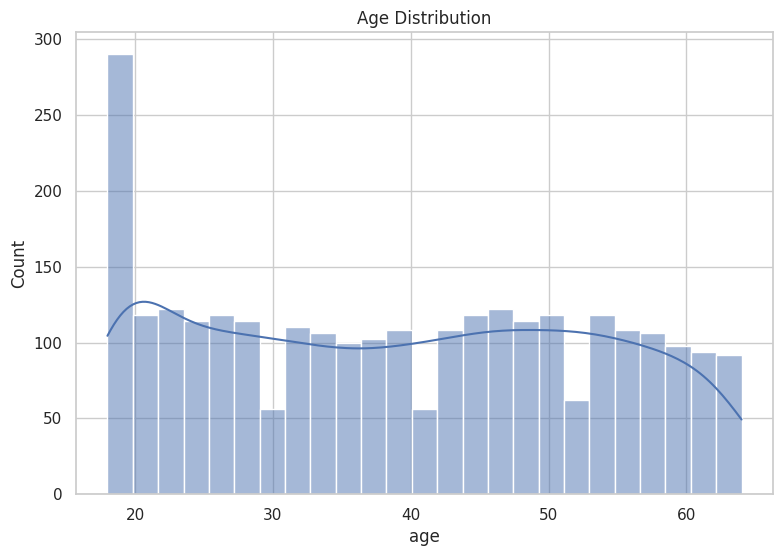

Majority of customers are between 20–50 years, representing working-age adults most likely to purchase insurance. Very few customers are elderly (>65).


In [ ]:
# Age Distribution
sns.histplot(df["age"], kde=True, bins=25)
plt.title("Age Distribution")
plt.show()
print("Majority of customers are between 20–50 years, representing working-age adults most likely to purchase insurance. Very few customers are elderly (>65).")

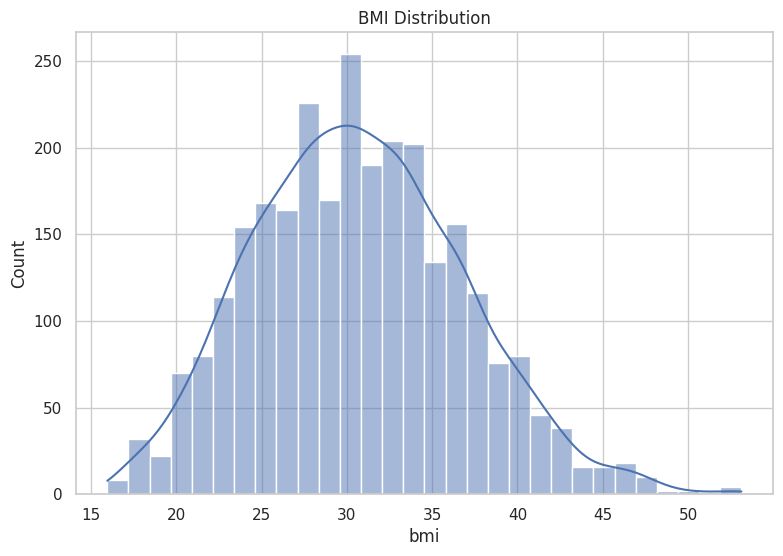

BMI is centered around 25–30, meaning many customers are overweight or obese. Underweight cases are rare.


In [ ]:
# BMI Distribution
sns.histplot(df["bmi"], kde=True, bins=30)
plt.title("BMI Distribution")
plt.show()
print("BMI is centered around 25–30, meaning many customers are overweight or obese. Underweight cases are rare.")

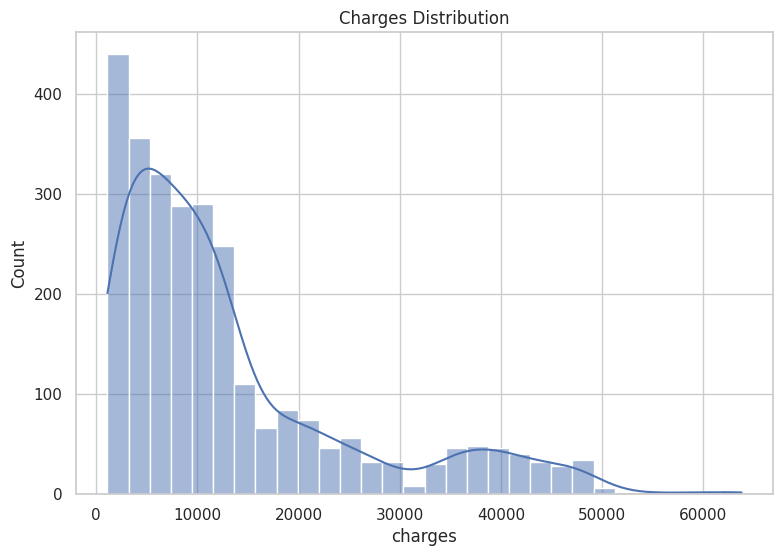

Charges are right-skewed, with most individuals paying <20k, but a few paying >50k, likely due to smoking or health risks.


In [ ]:
# Charges Distribution
sns.histplot(df["charges"], kde=True, bins=30)
plt.title("Charges Distribution")
plt.show()
print("Charges are right-skewed, with most individuals paying <20k, but a few paying >50k, likely due to smoking or health risks.")

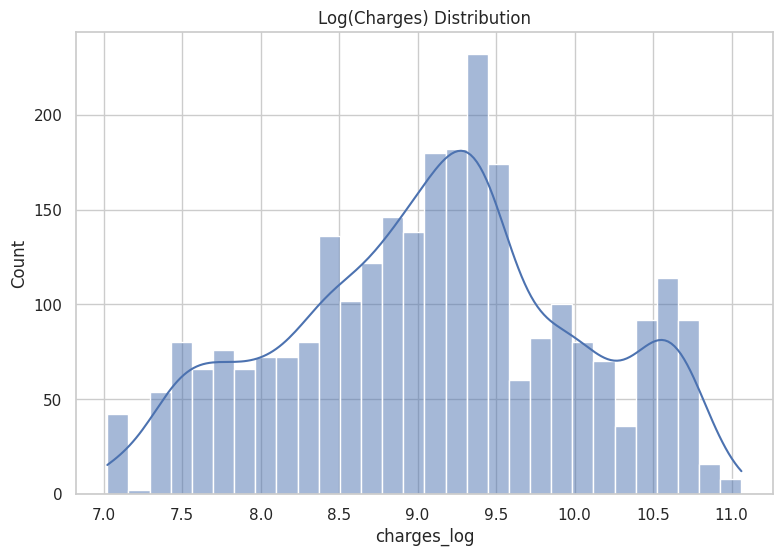

After log transformation, charges distribution is more normal, making it easier to analyze relationships.


In [ ]:
# Log Charges Distribution
sns.histplot(df["charges_log"], kde=True, bins=30)
plt.title("Log(Charges) Distribution")
plt.show()
print("After log transformation, charges distribution is more normal, making it easier to analyze relationships.")

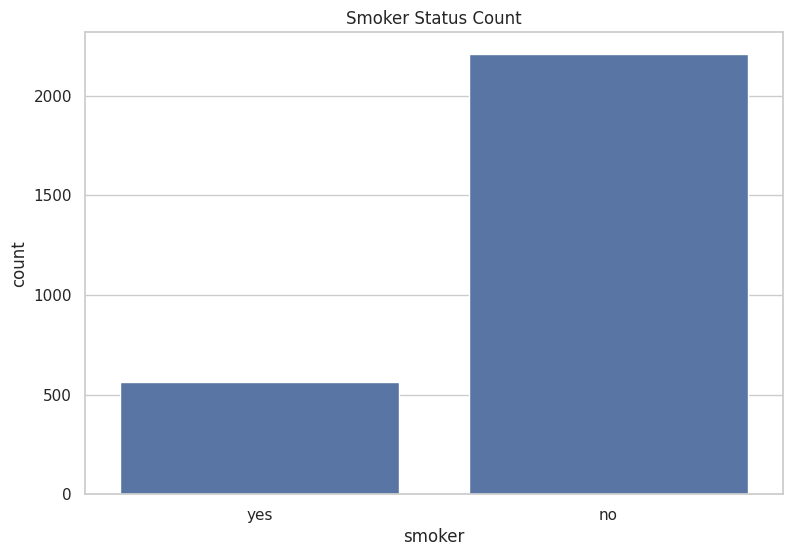

Most customers are non-smokers, but a significant portion are smokers, which is critical since smoking drastically increases insurance charges.


In [ ]:
# Smoker Count
sns.countplot(x="smoker", data=df)
plt.title("Smoker Status Count")
plt.show()
print("Most customers are non-smokers, but a significant portion are smokers, which is critical since smoking drastically increases insurance charges.")

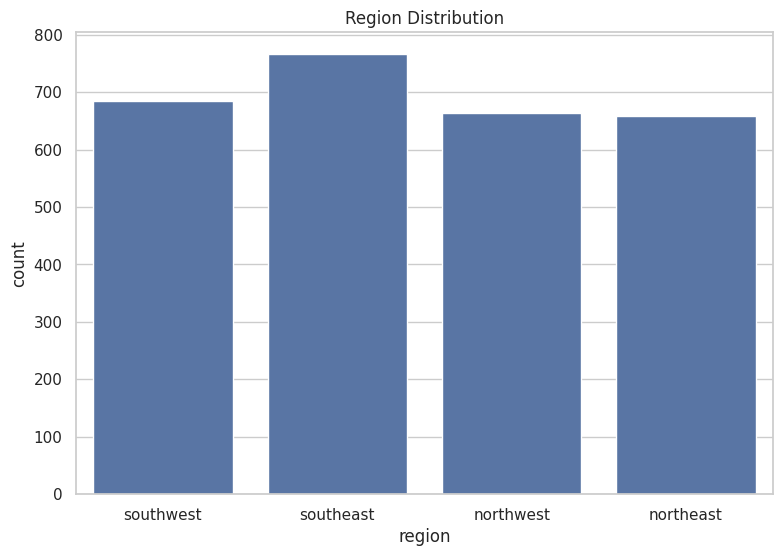

Data is fairly balanced across the four regions (NE, NW, SE, SW), meaning region comparisons are reliable.


In [ ]:
# Region Count
sns.countplot(x="region", data=df)
plt.title("Region Distribution")
plt.show()
print("Data is fairly balanced across the four regions (NE, NW, SE, SW), meaning region comparisons are reliable.")

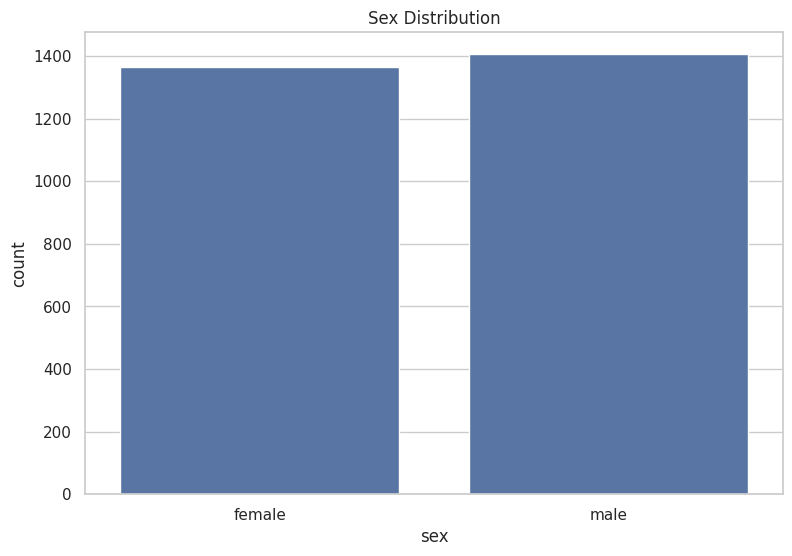

Dataset has nearly equal male and female representation, so gender-based comparisons are valid.


In [ ]:
# Sex Count
sns.countplot(x="sex", data=df)
plt.title("Sex Distribution")
plt.show()
print("Dataset has nearly equal male and female representation, so gender-based comparisons are valid.")

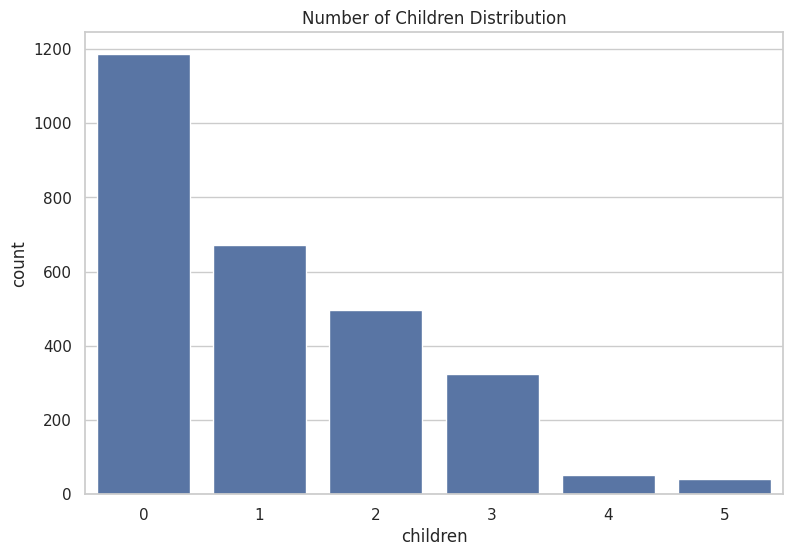

Most families have 0–2 children. Very few customers have >4 children, suggesting smaller household sizes are common.


In [ ]:
# Children Count
sns.countplot(x="children", data=df)
plt.title("Number of Children Distribution")
plt.show()
print("Most families have 0–2 children. Very few customers have >4 children, suggesting smaller household sizes are common.")

### BIVARIATE ANALYSIS

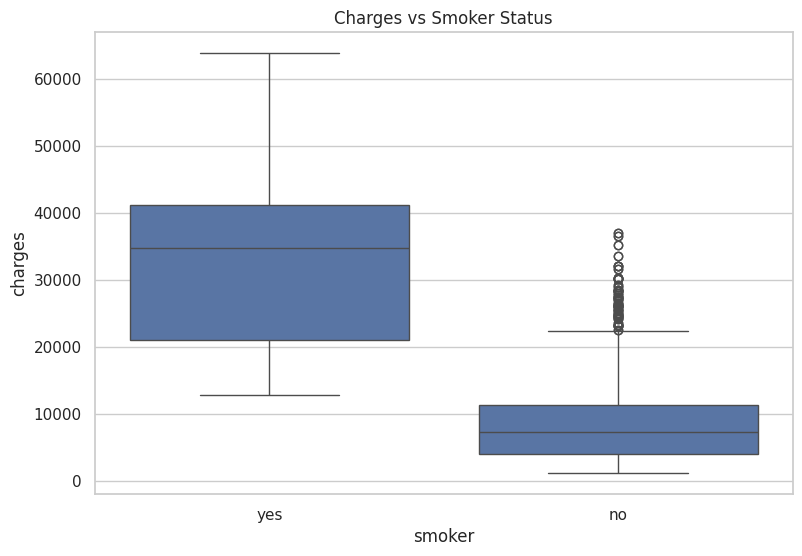

Smokers have drastically higher charges with larger variation compared to non-smokers, confirming smoking as the strongest predictor of charges.


In [ ]:
# Charges by Smoker
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges vs Smoker Status")
plt.show()
print("Smokers have drastically higher charges with larger variation compared to non-smokers, confirming smoking as the strongest predictor of charges.")

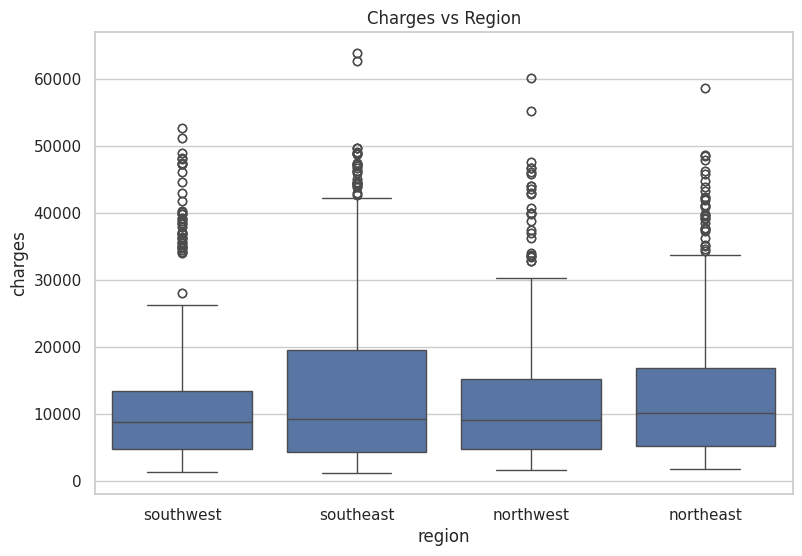

Regional differences exist but are less pronounced than smoking or BMI. Southeast shows slightly higher median charges.


In [ ]:
# Charges by Region
sns.boxplot(x="region", y="charges", data=df)
plt.title("Charges vs Region")
plt.show()
print("Regional differences exist but are less pronounced than smoking or BMI. Southeast shows slightly higher median charges.")

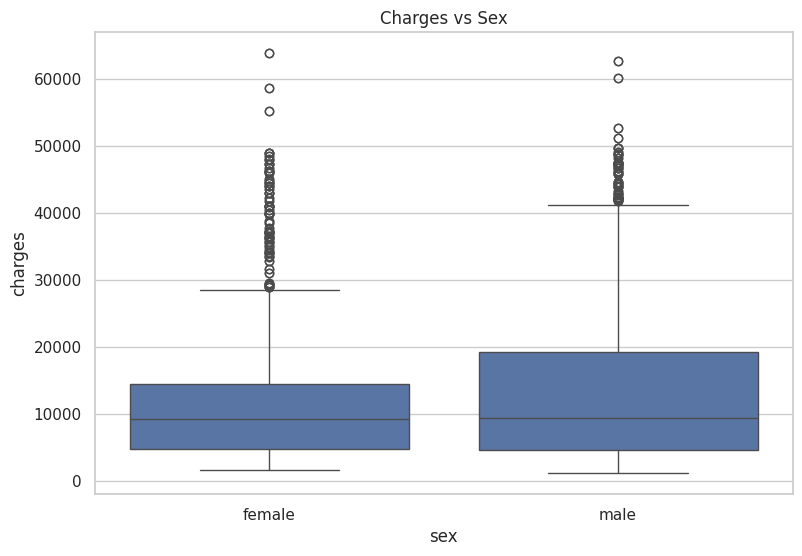

Charges are almost identical across male and female customers, showing sex has minimal influence on pricing.


In [ ]:
# Charges by Sex
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Charges vs Sex")
plt.show()
print("Charges are almost identical across male and female customers, showing sex has minimal influence on pricing.")

/tmp/ipython-input-1706044732.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




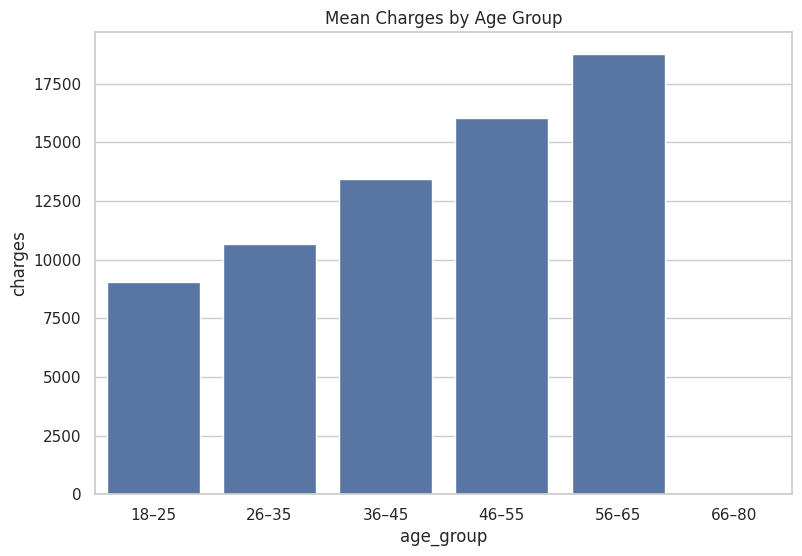

Average charges increase steadily with age, especially after 45 years, reflecting higher health risks in older populations.


In [ ]:
# Charges by Age Group
sns.barplot(x="age_group", y="charges", data=df, estimator=np.mean, ci=None)
plt.title("Mean Charges by Age Group")
plt.show()
print("Average charges increase steadily with age, especially after 45 years, reflecting higher health risks in older populations.")

/tmp/ipython-input-824080145.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




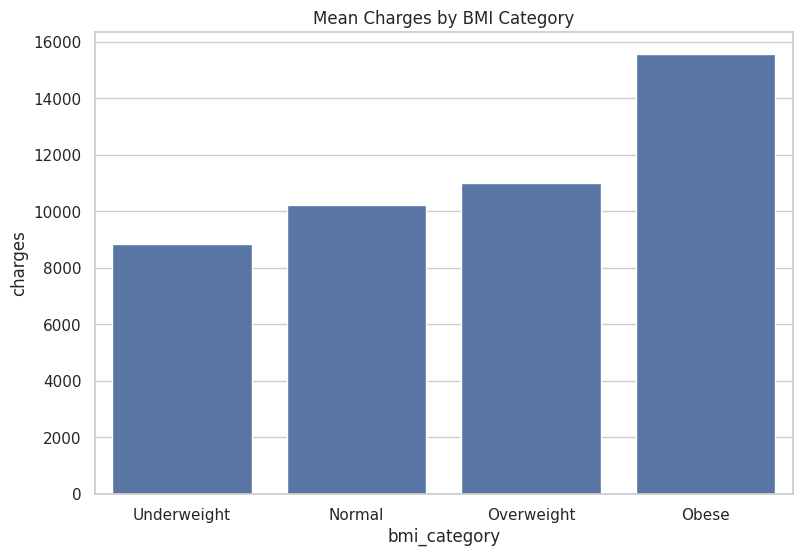

Obese individuals pay significantly higher charges than those in normal or underweight categories.


In [ ]:
# Charges by BMI Category
sns.barplot(x="bmi_category", y="charges", data=df, estimator=np.mean, ci=None,
            order=["Underweight","Normal","Overweight","Obese"])
plt.title("Mean Charges by BMI Category")
plt.show()
print("Obese individuals pay significantly higher charges than those in normal or underweight categories.")

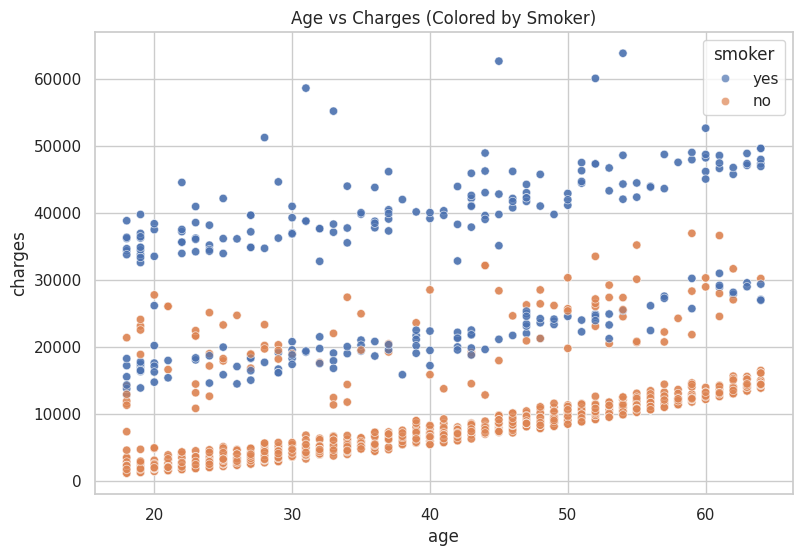

Non-smokers show a gradual rise in charges with age, while smokers have very high charges at all ages, even young ones.


In [ ]:
# Age vs Charges (smoker color)
sns.scatterplot(x="age", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("Age vs Charges (Colored by Smoker)")
plt.show()
print("Non-smokers show a gradual rise in charges with age, while smokers have very high charges at all ages, even young ones.")

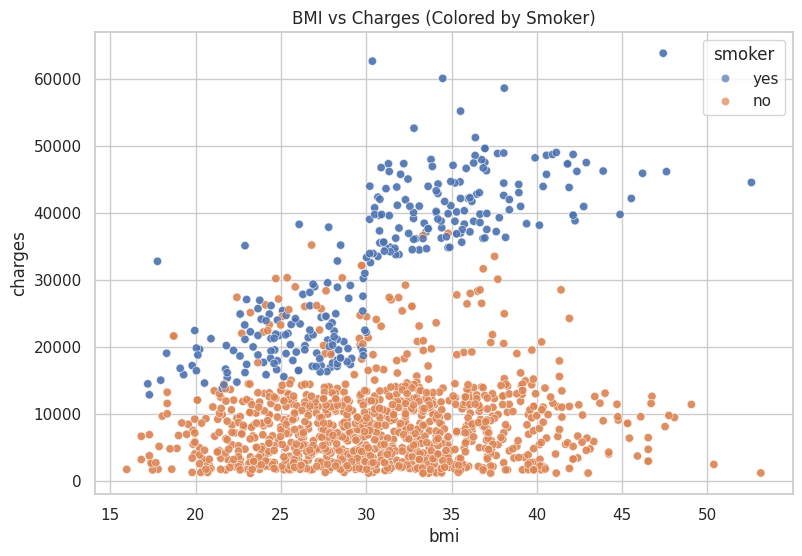

Among smokers, high BMI is associated with extreme charges. For non-smokers, charges rise moderately with BMI.


In [ ]:
# BMI vs Charges (smoker color)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("BMI vs Charges (Colored by Smoker)")
plt.show()
print("Among smokers, high BMI is associated with extreme charges. For non-smokers, charges rise moderately with BMI.")

/tmp/ipython-input-3857562266.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




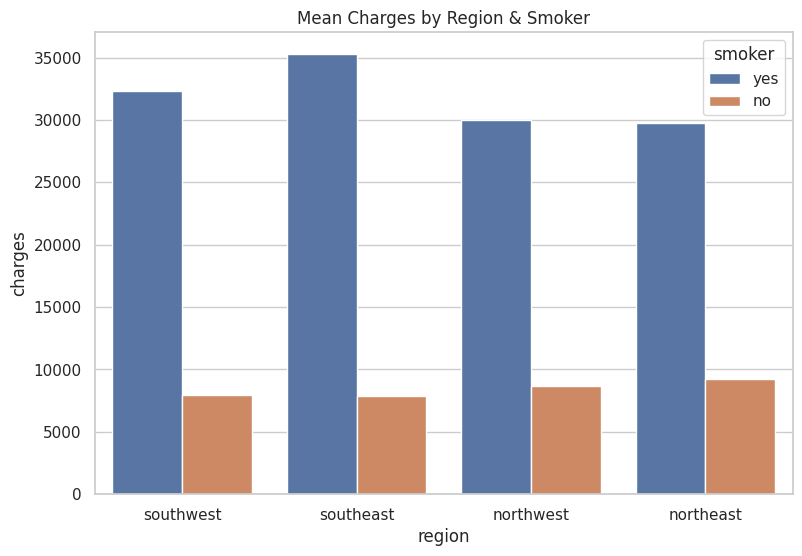

In every region, smokers consistently have higher charges. Southeast smokers face the highest costs overall.


In [ ]:
# Region vs Charges (smoker hue)
sns.barplot(x="region", y="charges", hue="smoker", data=df, estimator=np.mean, ci=None)
plt.title("Mean Charges by Region & Smoker")
plt.show()
print("In every region, smokers consistently have higher charges. Southeast smokers face the highest costs overall.")

### CORRELATION ANALYSIS

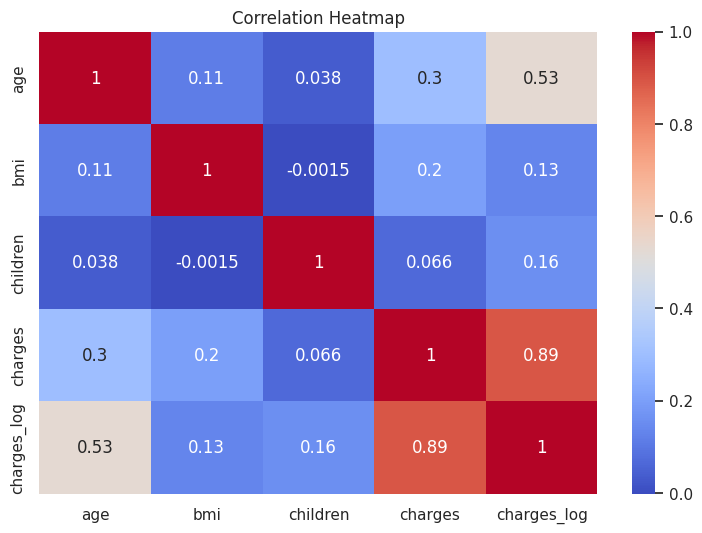

Age, BMI, and number of children all show positive correlations with charges, but smoking (not numeric here) is the dominant driver.


In [ ]:
# Correlation Heatmap
corr = df[["age","bmi","children","charges","charges_log"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print("Age, BMI, and number of children all show positive correlations with charges, but smoking (not numeric here) is the dominant driver.")

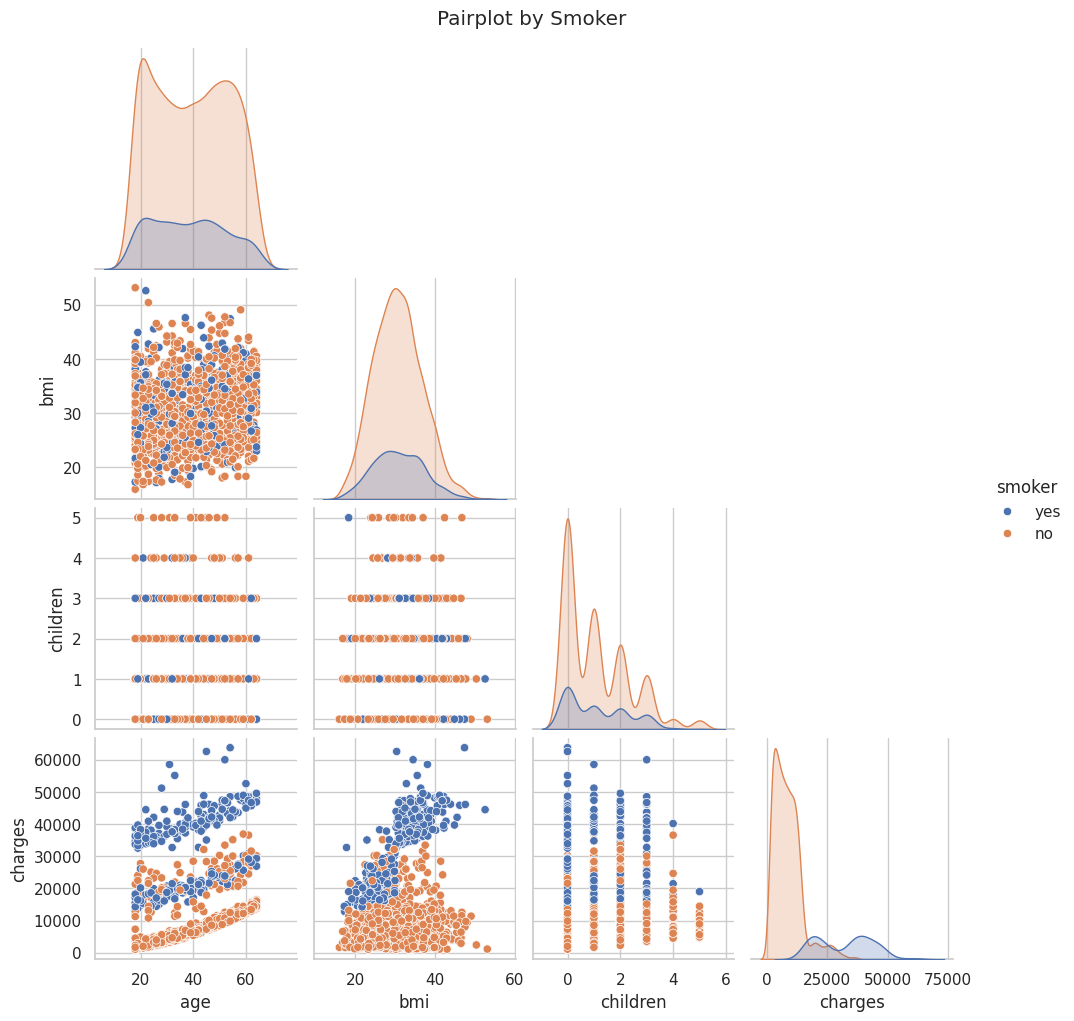

Pairplot clearly shows two distinct groups: smokers with high charges, and non-smokers with lower charges, regardless of BMI or age.


In [ ]:
# Pairplot (smoker hue)
sns.pairplot(df[["age","bmi","children","charges","smoker"]], hue="smoker", diag_kind="kde", corner=True)
plt.suptitle("Pairplot by Smoker", y=1.02)
plt.show()
print("Pairplot clearly shows two distinct groups: smokers with high charges, and non-smokers with lower charges, regardless of BMI or age.")

## Conclusion
EDA shows that smoking status, BMI, age, and region are strong predictors of insurance charges.  
Smokers consistently have much higher charges than non-smokers.  
Charges increase with age and BMI, particularly among smokers.  
Region has a moderate impact, while sex shows minimal effect.  
These insights help insurers set fairer pricing models and allow policyholders to understand the drivers of their insurance costs.